![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/05/logo-upv-horizontal.png)
![PIC UPV PERTE Chip Chair Logo](https://www.pic-chair.upv.es/wp-content/uploads/2024/06/logos-perte-chip-1024x119.png)


# Laboratory 1. Waveguides

Welcome to our Photonic Integrated Circuits Laboratory! Throughout the course, we will be using a Python package called [GDSFactory](https://gdsfactory.github.io/gdsfactory/index.html). This is an open-source tool, and is a great alternative to other commercial software like Synopsys Optodesigner, Luceda Photonics, or Lumerical/Interconnect. Since it runs on Python, you have two options for executing your laboratory tasks:

1. **Local installation on your own PC** (Recommended): Please note that we will not spend class time on installing the software. However, feel free to reach out if you need help with the installation.

2. **Cloud Workspace**: Alternatively, you can use a cloud-based solution if the Local installation does not work.

## 0. Imports

For this laboratory you will need the following libraries:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tidy3d as td

import gplugins as gp
import gplugins.tidy3d as gt
from gplugins import plot
from gplugins.common.config import PATH

nm = 1e-3
wavelength = np.linspace(1500, 1600,11) * nm
f = td.C_0 / wavelength


## LO.1. Effective index of a waveguide

### 1.1. Materials

We need the refractive index of each material in the cross-section. There are different options to get this information, such as [RefractiveIndex.info](https://refractiveindex.info/) and the [Material Library from Tidy3D](https://docs.flexcompute.com/projects/tidy3d/en/v2.6.0/api/material_library.html#). Here we will load and check the characteristics from the most common materials used in fabrication of photonic circuits: **silicon (Si), silicon nitride (SiNx) and silicon dioxide (SiO2)**.

#### 1.1.1. Crystalline Silicon 

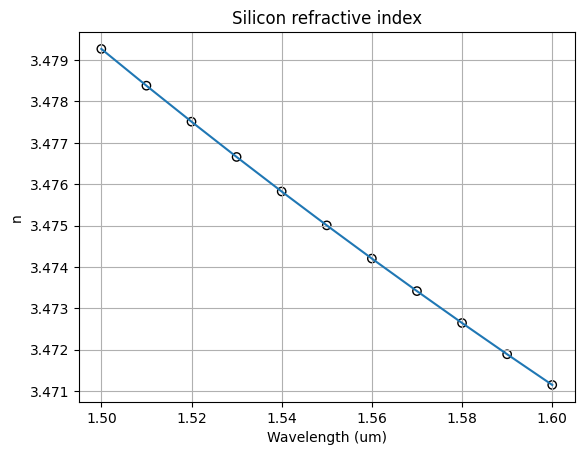

In [5]:
## Material model loaded
si_complex = td.material_library["cSi"]["Li1993_293K"].eps_model(f)
## Check the Tidy3D Docs for more information on the "Variant"

## Index at a particular wavelength
si_index , si_k = td.Medium.eps_complex_to_nk(si_complex)
plt.scatter(wavelength, si_index,edgecolors='k',facecolors='none')
plt.plot(wavelength,si_index)
plt.title("Silicon refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()

#### 1.1.2. Silicon Nitride

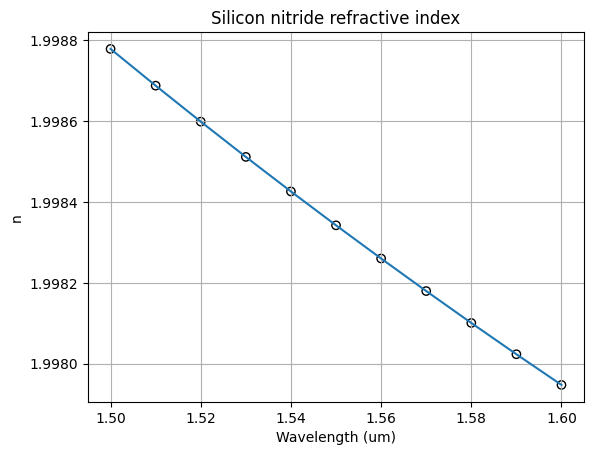

In [4]:
nitride_complex = td.material_library["Si3N4"]["Luke2015PMLStable"].eps_model(f)
nitride_index, nitride_k = td.Medium.eps_complex_to_nk(nitride_complex)
plt.scatter(wavelength,nitride_index,edgecolors='k',facecolors='none')
plt.plot(wavelength, nitride_index)
plt.title("Silicon nitride refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()


#### 1.1.3. Silicon Dioxide

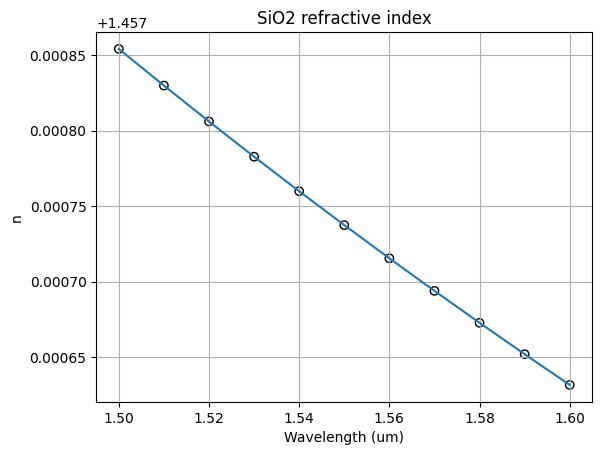

In [ ]:
box_complex = td.material_library["SiO2"]["Horiba"].eps_model(f)
box_index, box_k = td.Medium.eps_complex_to_nk(box_complex)
plt.scatter(wavelength,box_index,edgecolors='k',facecolors='None')
plt.plot(wavelength, box_index)
plt.title("SiO2 refractive index")
plt.xlabel("Wavelength (um)")
plt.ylabel("n")
plt.grid()

### 1.2. Cross - Section Definition

In GDSFactory - Tidy3d modesolver we just have to use the [gt.modes.Waveguide()](https://gdsfactory.github.io/gplugins/_autosummary/gplugins.tidy3d.modes.Waveguide.html) function. 
It implements the **deep (rib)** and **shallow (ridge)** waveguide variants. The following example corresponds to a **deep** waveguide for the **silicon nitride** fabrication proccess, this means that the **cladding** material is silicon dioxide and the **core** material is silicon nitride. The waveguide dimensions are 300 nm (height) and 1.2 um (width). We will check it's behavior at 1.55 um. 

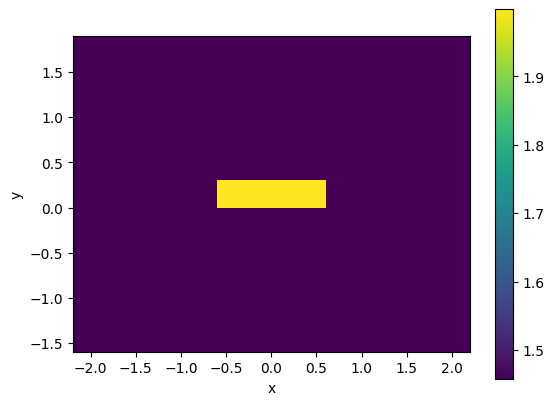

In [ ]:
deep_waveguide = gt.modes.Waveguide(
    # Geometrical Parameters
    core_width=1.2, # Waveguide width
    core_thickness=300 * nm, # Waveguide height 
    slab_thickness=0 * nm, # For shallow waveguides - Set to 0 if its a deep-etched waveguide.
    # Materials
    core_material='sin', #  Material of the waveguide
    clad_material='sio2', # Surrounding material
    # Modesolver Parameters
    wavelength=1550 * nm, # Wavelength to simulate
    num_modes=4, # Targeted number of modes to find 
    max_grid_scaling=1.5, # Parameters of the grid 
    grid_resolution=20, # Parameters of the grid
    cache_path='.cache/', # Important! In order to save simulation time, set your cache Path!
    precision='double',
)

deep_waveguide.plot_index()

### 1.3. Simulations

#### 1.3.1. Numerical results

We can find the effective index (n_eff), TE and TM fraction for each particular cross-section.

In [7]:
deep_waveguide.n_eff

/Users/claudia/Desktop/CIFOIN/cifoin-lab1/.venv/lib/python3.12/site-packages/tidy3d/components/mode/derivatives.py:14: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxf = sp.csr_matrix(sp.diags([-1, 1], [0, 1], shape=(Nx, Nx)))
/Users/claudia/Desktop/CIFOIN/cifoin-lab1/.venv/lib/python3.12/site-packages/tidy3d/components/mode/derivatives.py:27: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxb = sp.csr_matrix(sp.diags([1, -1], [0, -1], shape=(Nx, Nx)))
/Users/claudia/Desktop/CIFOIN/cifoin-lab1/.venv/lib/python3

12:49:17 CET WARNING: Mode field at frequency index 0, mode index 2 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 0, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: The group index was not computed. To calculate group      
             index, pass 'group_index_step = True' in the 'ModeSpec'.           

2026-02-17 12:49:17.655 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into .cache/Waveguide_cf92515ae4232c65.npz.


array([1.60524792+0.00010066j, 1.52829803+0.00017753j,
       1.45072999+0.00019228j, 1.43325817+0.00021838j])

In [8]:
deep_waveguide.fraction_te

array([0.99505426, 0.01004259, 0.96264794, 0.047651  ])

In [9]:
deep_waveguide.fraction_tm

array([0.00494574, 0.98995741, 0.03735206, 0.952349  ])

#### 1.3.4. Plots

Text(0.5, 1.0, 'Titulo')

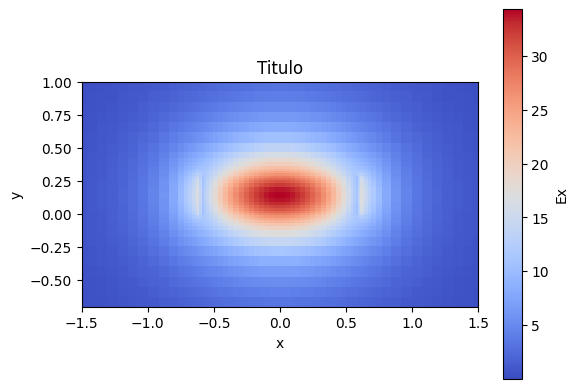

In [10]:
deep_waveguide.plot_field(mode_index=0 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                            cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)
) # 
plt.title('Titulo') # You might need this later :) 

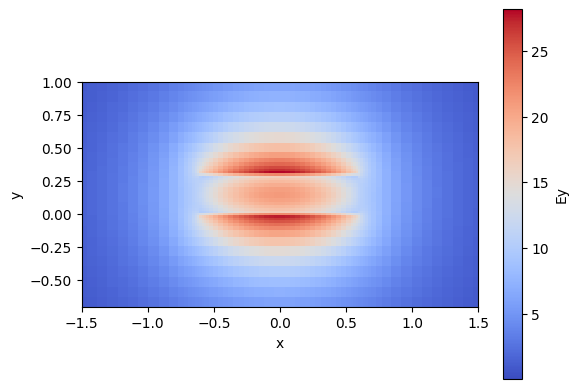

In [11]:
deep_waveguide.plot_field(mode_index=1 , # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

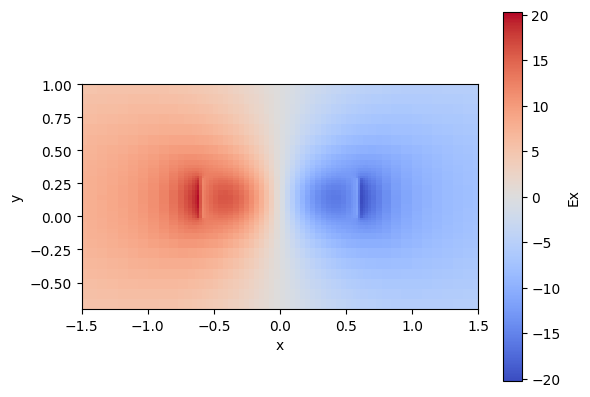

In [12]:
deep_waveguide.plot_field(mode_index=2 , # Mode to be plotted
                          field_name='Ex', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

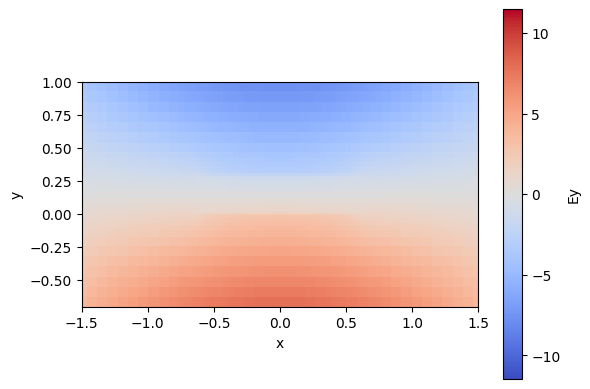

In [13]:
deep_waveguide.plot_field(mode_index=3, # Mode to be plotted
                          field_name='Ey', # Field to be plotted
                          value='real', # Real - abs - imag
                          cmap='coolwarm', # Suggestions: Change the plot color
                          xlim=(-1.5, 1.5), # Set the x and y limits
                          ylim=(-0.7, 1)) # 

**Important** 
These results are derived from a numerical method used to solve the EM problem, so they must always be interpreted carefully to assess their accuracy. You must check, for instance, if the value of each index neff is higher than the refractive index of the cladding. 

## LO.2. Wavelength behavior

- Let's find the wavelength dependence of the effective index of the SiNx deep waveguide described in LO1. Change the wavelength used at the waveguide cross-section function, it could be a vector also. 

2026-02-17 13:15:22.664 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_e70065e5b5dc42c3.npz.


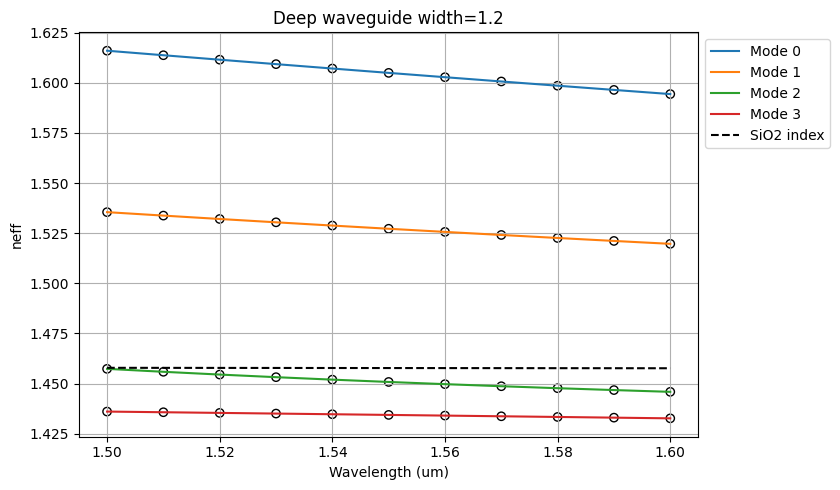

In [18]:
# The wavelength could be a vector also
wavelength = np.linspace(1500,1600,11) * nm # Student code here. Tip np.linspace()

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength, 
    core_width=1.2, 
    slab_thickness=0.0,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)

res_neff = deep_waveguide.n_eff # In this case, the result is not just a number, is a wavelength-dependent vector
res_te = deep_waveguide.fraction_te # Wavelength-dependent vector
res_tm =deep_waveguide.fraction_tm # Wavelength-dependent vector

plt.figure(figsize=(10, 5))
for k in range(res_neff.shape[1]):
    # It's necessary to 'access' each element on the array
    plt.scatter(wavelength, res_neff[:,k].real,edgecolors='k',facecolors='none',label = '__nolegend__')
    plt.plot(wavelength, res_neff[:,k].real,label=f'Mode {k}')
plt.title(f"Deep waveguide width={1.2}")
plt.xlabel("Wavelength (um)")
plt.ylabel("neff")
plt.grid()
# Common error: The box index variable was created in a previous cell. Check the dimensions match 
# with the newly created wavelength vector, or re-calculate the box index for the new one. 
plt.plot(wavelength, box_index,'k--', label='SiO2 index') 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])

/Users/claudia/Desktop/CIFOIN/cifoin-lab1/.venv/lib/python3.12/site-packages/tidy3d/components/mode/derivatives.py:14: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxf = sp.csr_matrix(sp.diags([-1, 1], [0, 1], shape=(Nx, Nx)))
/Users/claudia/Desktop/CIFOIN/cifoin-lab1/.venv/lib/python3.12/site-packages/tidy3d/components/mode/derivatives.py:27: FutureWarning: Input has data type int64, but the output has been cast to float64.  In the future, the output data type will match the input. To avoid this warning, set the `dtype` parameter to `None` to have the output dtype match the input, or set it to the desired output data type.
  dxb = sp.csr_matrix(sp.diags([1, -1], [0, -1], shape=(Nx, Nx)))
/Users/claudia/Desktop/CIFOIN/cifoin-lab1/.venv/lib/python3

13:22:59 CET WARNING: Mode field at frequency index 0, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 0, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 1, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 1, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 2, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 2, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 3, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 3, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 4, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 4, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 5, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 5, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 6, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 6, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 7, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 7, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 8, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 8, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 9, mode index 1 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 9, mode index 3 does not    
             decay at the plane boundaries.                                     

             WARNING: Mode field at frequency index 10, mode index 1 does not   
             decay at the plane boundaries.                                     

13:23:00 CET WARNING: Mode field at frequency index 10, mode index 3 does not   
             decay at the plane boundaries.                                     

2026-02-17 13:23:00.058 | INFO     | gplugins.tidy3d.modes:_data:306 - store data into .cache/Waveguide_cf0af488213d9e23.npz.


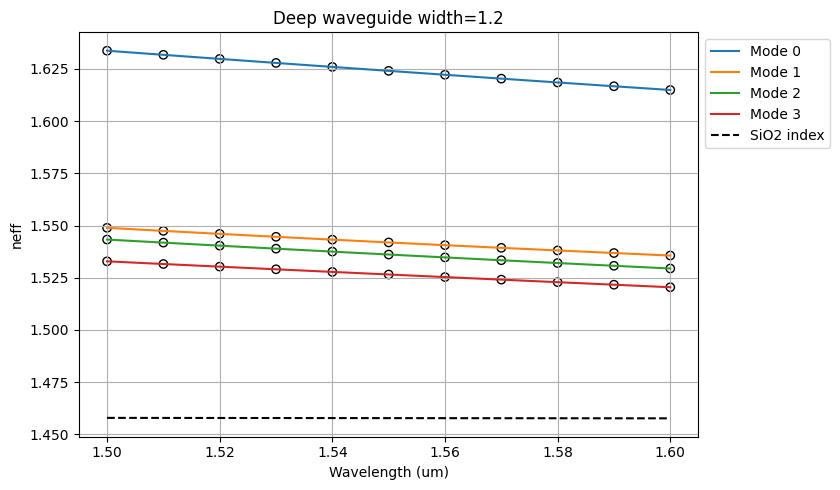

In [20]:
# The wavelength could be a vector also ( shallow waveguide)
wavelength = np.linspace(1500,1600,11) * nm # Student code here. Tip np.linspace()

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength, 
    core_width=1.2, 
    slab_thickness= 150*nm,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)

res_neff = deep_waveguide.n_eff # In this case, the result is not just a number, is a wavelength-dependent vector
res_te = deep_waveguide.fraction_te # Wavelength-dependent vector
res_tm =deep_waveguide.fraction_tm # Wavelength-dependent vector

plt.figure(figsize=(10, 5))
for k in range(res_neff.shape[1]):
    # It's necessary to 'access' each element on the array
    plt.scatter(wavelength, res_neff[:,k].real,edgecolors='k',facecolors='none',label = '__nolegend__')
    plt.plot(wavelength, res_neff[:,k].real,label=f'Mode {k}')
plt.title(f"Deep waveguide width={1.2}")
plt.xlabel("Wavelength (um)")
plt.ylabel("neff")
plt.grid()
# Common error: The box index variable was created in a previous cell. Check the dimensions match 
# with the newly created wavelength vector, or re-calculate the box index for the new one. 
plt.plot(wavelength, box_index,'k--', label='SiO2 index') 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])

- Repeat the analysis for a **shallow**ly etched waveguide with a 150 nm slab heigth. 

## LO.3. Width dependence

- Perform a sweep of the **deep** waveguide width. Use the code provided in the following cell or program your own sweep. 

  0%|          | 0/11 [00:00<?, ?it/s]

2026-02-17 13:34:18.778 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_e0f2a62752cad497.npz.
2026-02-17 13:34:18.789 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_38e941debfe044d4.npz.
2026-02-17 13:34:18.793 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_575965d134f345c4.npz.
2026-02-17 13:34:18.795 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_3ca61e62fe85ccf2.npz.
2026-02-17 13:34:18.798 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_8b617c8aef408673.npz.
2026-02-17 13:34:18.800 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_cd84020834745298.npz.
2026-02-17 13:34:18.801 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_29761b037c0c9026.npz.
2026-02-17 13:34:18.803 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_a4e198a34f8f1987.npz.


  0%|          | 0/11 [00:00<?, ?it/s]

2026-02-17 13:34:18.821 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_e0f2a62752cad497.npz.
2026-02-17 13:34:18.825 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_38e941debfe044d4.npz.
2026-02-17 13:34:18.828 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_575965d134f345c4.npz.
2026-02-17 13:34:18.844 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_3ca61e62fe85ccf2.npz.
2026-02-17 13:34:18.846 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_8b617c8aef408673.npz.
2026-02-17 13:34:18.849 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_cd84020834745298.npz.
2026-02-17 13:34:18.851 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_29761b037c0c9026.npz.
2026-02-17 13:34:18.854 | INFO     | gplugins.tidy3d.modes:_data:266 - load data from .cache/Waveguide_a4e198a34f8f1987.npz.


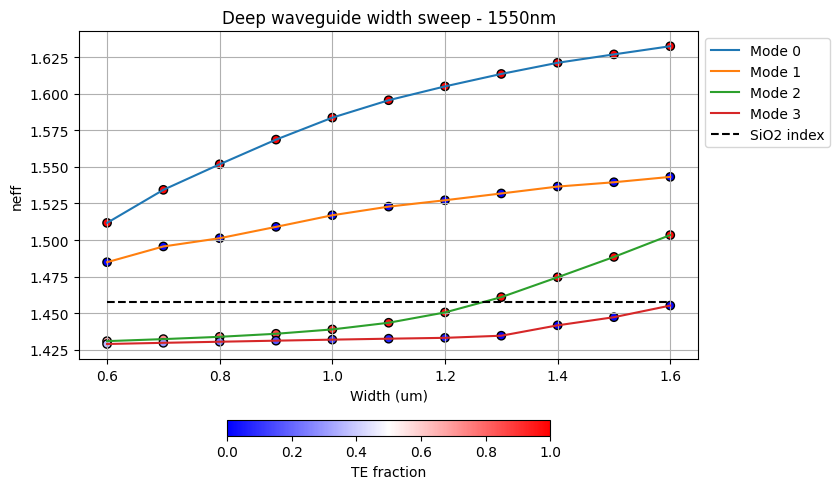

In [23]:
wavelength = 1550 * nm # Student code here

deep_waveguide = gt.modes.Waveguide(
    wavelength=wavelength,
    core_width=1.2,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    slab_thickness=0 * nm,
    num_modes=4,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=20, 
)

w =  np.linspace(600,1600,11) * nm # Student code here

sweep_neff = gt.modes.sweep_n_eff(deep_waveguide, 
                             core_width=w)

sweep_tefraction = gt.modes.sweep_fraction_te(deep_waveguide,
                                              core_width=w)

plt.figure(figsize=(10, 5))
for k in range(sweep_neff.shape[1]):
    plt.scatter(w, sweep_neff[:,k].real,edgecolors='k',c=sweep_tefraction.sel(mode_index=k),vmin=0, vmax=1,label = '__nolegend__',cmap='bwr')
    plt.plot(w, sweep_neff[:,k].real,label=f'Mode {k}')

plt.title("Deep waveguide width sweep - 1550nm")
plt.xlabel("Width (um)")
plt.ylabel("neff")
plt.grid()
plt.hlines(np.mean(box_index), xmin=np.min(w), xmax=np.max(w), colors='k', linestyles='dashed',label='SiO2 index')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.colorbar(orientation='horizontal',fraction=0.04).set_label("TE fraction")

## LO.4. Waveguide compact model

A compact model of an integrated photonic waveguide is a reduced-order mathematical model that describes the waveguide’s optical behavior—such as phase propagation, loss, and dispersion, using analytical or semi-analytical equations. Consider: 

Consider: 

The transfer function for propagation in a waveguide:

$$
H(\lambda)
= e^{-j\,\gamma(\lambda)\,z}
= e^{-j\,\mathrm{Re}\{\gamma(\lambda)\}\,z}\,
  e^{\mathrm{Im}\{\gamma(\lambda)\}\,z}.
$$

Where 

$$
\beta(\lambda) = \mathrm{Re}\{\gamma(\lambda)\}\,z
= \frac{2\pi}{\lambda}\,n_\mathrm{eff}(\lambda).
$$

Let's model the waveguide's effective index wavelength variation using a second order polynomial:

$$
n_\mathrm{eff}(\lambda)
= n_{1} + n_{2}\,(\lambda-\lambda_{0}) + n_{3}\,(\lambda-\lambda_{0})^{2}
$$

Where 

1. 
$$
n_\mathrm{eff}(\lambda_0) = n_1
$$
2. 
$$
n_g(\lambda_0) = n_1 - n_2\,\lambda_0
$$
3. 
$$
D = -\frac{2\,\lambda_0\,n_3}{c}\;\;[\mathrm{s}^2/\mathrm{m}]
$$

- Find the values for n, ng and D of the following waveguides: 
    - Deep waveguide, height = 300nm, width = 1.2um 
    - Shallow waveguide, core height = 300nm, slab height = 150 nm, width = 1.2um 

**TIP**. Use the Lab0.1.Modesolver results (neff vs lambda) as starting point. Fit the results using a second order polynomial (with the lambda_0 shift) and relate the fit results to n_g and D values.

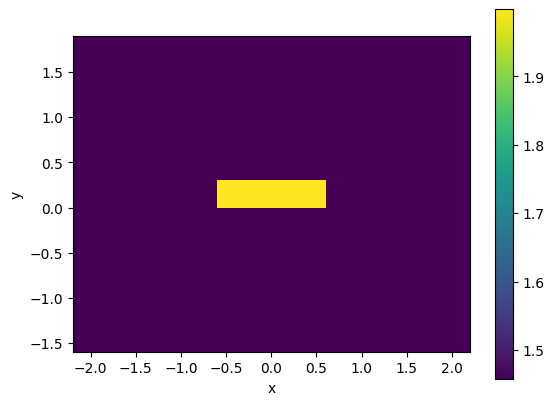

In [ ]:
deep_waveguide = gt.modes.Waveguide(
    # Geometrical Parameters
    core_width=1.2, # Waveguide width
    core_thickness=300 * nm, # Waveguide height 
    slab_thickness=0 * nm, # For shallow waveguides - Set to 0 if its a deep-etched waveguide.
    # Materials
    core_material='sin', #  Material of the waveguide
    clad_material='sio2', # Surrounding material
    # Modesolver Parameters
    wavelength=1550 * nm, # Wavelength to simulate
    num_modes=4, # Targeted number of modes to find 
    max_grid_scaling=1.5, # Parameters of the grid 
    grid_resolution=20, # Parameters of the grid
    cache_path='.cache/', # Important! In order to save simulation time, set your cache Path!
    precision='double',

)
#Fit the results using a second order polynomial (with the lambda_0 shift) and relate the fit results to n_g and D values.
n1 = deep_waveguide.n_eff
n2= 1/2 * n1/ deep_waveguide 



deep_waveguide.plot_index()

## LO.5. Bend waveguide radius vs. loss – deep

The bend loss has three primary contributions:

1. Mode-mismatch loss
2. Radiation loss
3. Propagation loss

In [ ]:
bend_1550 = gt.modes.Waveguide(
    wavelength=1550 * nm,
    core_width=1.2,
    slab_thickness=0.0,
    core_material='sin',
    clad_material='sio2',
    core_thickness=300 * nm,
    num_modes=1,
    cache_path='.cache/',
    precision='double',
    max_grid_scaling=1.2,
    grid_resolution=30, 
    bend_radius=20, # Bend radius
)

bend_1550.plot_field(field_name="Ex", 
                     mode_index=0, # Field to be plotted
                     value='real', # Real - abs - imag
                     cmap='coolwarm',
                     xlim=(-1.5, 1.5), # Set the x and y limits
                     ylim=(-0.7, 1)) 

### Mode-mismatch loss

Bend waveguide mode differs slightly from the straight waveguide mode, wich yield into mode-convertion losses. We can calculate this factor with as the overlap of the latter two modes. 

This is already implemented on GDSfactory library: 

In [ ]:
radii = np.arange(20.0, 120,11)

mismatch = gt.modes.sweep_bend_mismatch(bend_1550, radii)

plt.plot(radii, 10 * np.log10(mismatch))
plt.title("Strip waveguide bend")
plt.xlabel("Radius (μm)")
plt.ylabel("Mismatch (dB)")

### Propagation loss

Consider the equivalent linear length of the quarter-circle bend. Light will attenuate following a trend quantified with the experimentally measured parameter $$\alpha [\mathrm{dB}/\mathrm{cm}]$$. It depends on the fabrication process mainly. We will add this loss (in dBs) to the mode-mismatch loss to calculate the total loss per bend. 

*We are not considering the radiation losses, mainly because is not easy to implement a quick simulation for this parameter. Under certain conditions, the main loss sources are the ones considered in this example


In [ ]:
dB_cm = 1.5  # dB/cm Technology loss - 
length = 0.5 * np.pi * radii * 1e-6
propagation_loss = dB_cm * length * 1e2
propagation_loss

plt.title("Bend loss for TE polarization")
plt.plot(radii, -10 * np.log10(mismatch), ".", label="Mode loss")
plt.plot(radii, propagation_loss, ".", label="Propagation loss")
plt.plot(radii, propagation_loss-10 * np.log10(mismatch), ".", label="Total loss")
plt.xlabel("Bend radius (um)")
plt.ylabel("Loss (dB)")
plt.legend()

- Use the code provided in this section to calculate the safe radius for 1.2 um width deep waveguides at 1.5 um. Consider safe means less than 0.1 dB/90º

## EXTRA

All the past simulations were done considering as core material de Silicon Nitride (SiNx) and Silicon Dioxide (SiO2) as cladding material. Now, **simulate the Silicon-On-Insulator technology changing the core material to Silicon (Si)**. In this case, the dimensions will be 220 nm heigth and 500 nm width. 
1. Repeat the LO.2. wavelength behavior simulations, considering the updated materials and dimensions. 
2. Repeat the LO.3. width dependence analysis, now sweeping in a 300nm - 1um range. 
3. Find the safe radius for this technology. Consider sweeping the radius in a 5um to 30um range. 
4. **Compare the SiNx and SOI technologies** 

## Grading

LO.1. 1 Point <br> 
LO.2. 2 Points <br> 
LO.3. 1 Point <br> 
LO.4. 2 Points <br> 
LO.5. 1 Point <br> 
**Total 7 Points** <br>
Extra (Up to) 3 Points
